In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

In [151]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [152]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']


In [153]:
x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


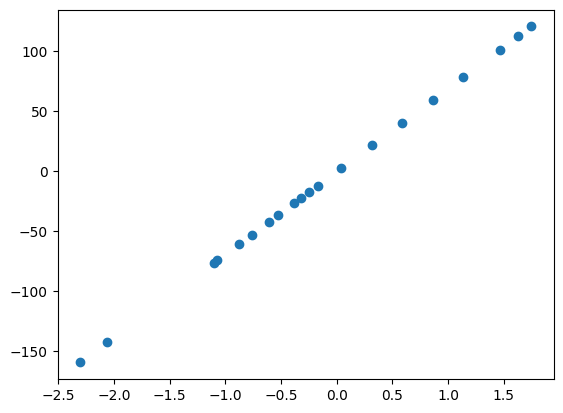

In [154]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [155]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    def fit(self, X, Y): #Градиентный спуск
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [156]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


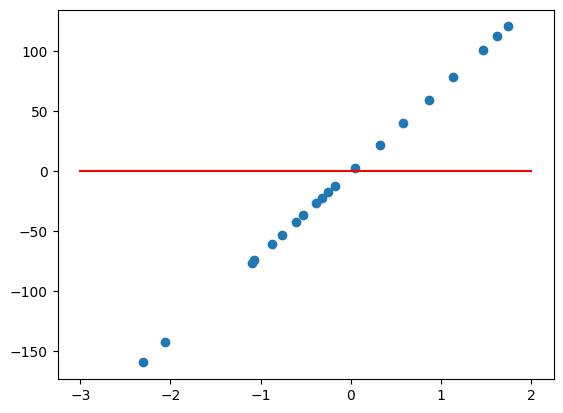

In [157]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [158]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


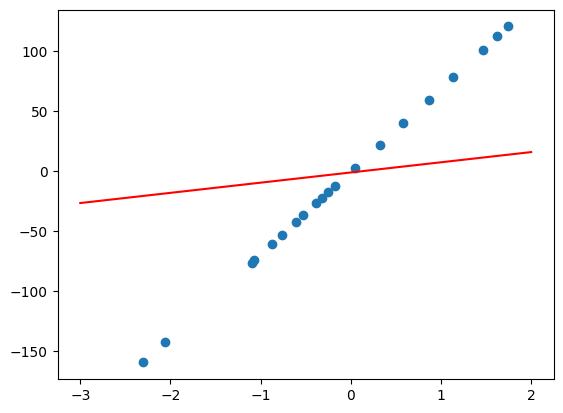

In [159]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [160]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(2500):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [161]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 7.632954956097281


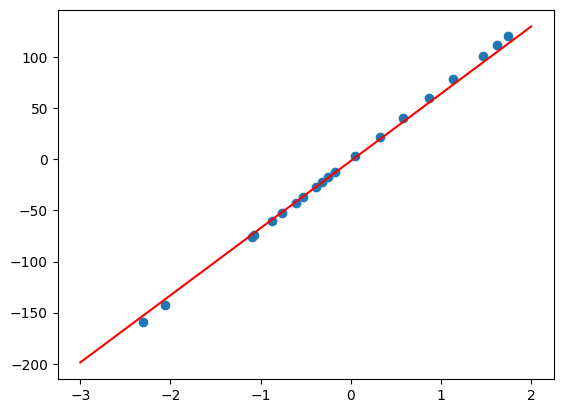

In [162]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

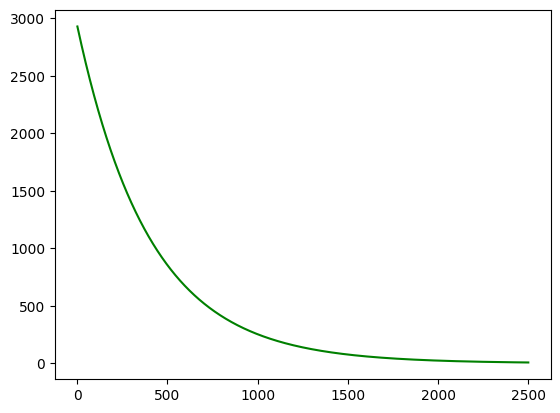

In [163]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## Задания для самостоятельного выполнения

Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [164]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(2500):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [165]:
hyp = Model(b0=0, b1=0)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

hyp1 = Model(b0=1, b1=1)
steps, errors = hyp1.fit(x, y)
J1 = hyp1.error(x, y)
print("error after gradient descent:", J1)

hyp2 = Model(b0=2, b1=2)
steps, errors = hyp2.fit(x, y)
J2 = hyp2.error(x, y)
print("error after gradient descent:", J2)

error after gradient descent: 7.632954956097281
error after gradient descent: 7.247836259489524
error after gradient descent: 6.878320521320078


Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

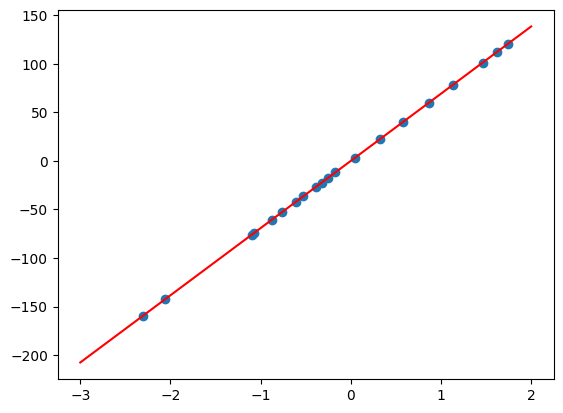

In [166]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha = 1.5)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

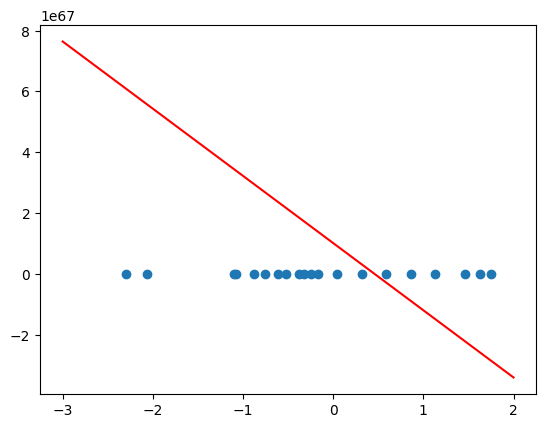

In [167]:
hyp = Model()
steps, errors = hyp.fit(x, y, alpha = 1.6)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [168]:
class Model(object):
    """Модель парной линейной регрессии с поддержкой DataFrame"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def _prepare_data(self, data):
        if isinstance(data, pd.DataFrame):
            return data.iloc[:, 1].values  # Берем второй столбец
        elif isinstance(data, pd.Series):
            return data.values
        return np.array(data)
    def predict(self, X):
        X = self._prepare_data(X)
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        steps, errors = [], []
        step = 0

        for _ in range(max_steps):
            predictions = self.predict(X)
            dJ0 = sum(predictions - Y) / len(X)
            dJ1 = sum((predictions - Y) * X) / len(X)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if len(errors) > 1 and abs(errors[-2] - errors[-1]) < accuracy:
                break
        return steps, errors

In [169]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

hyp = Model(b0=0, b1=0)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 4.4961047667431675


In [170]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

hyp = Model(b0=0, b1=0)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 4.4961047667431675


Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [171]:
class Model(object):
    """Модель парной линейной регрессии с улучшенным градиентным спуском"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def _prepare_data(self, data):
        if isinstance(data, pd.DataFrame):
            return data.iloc[:, 1].values
        elif isinstance(data, pd.Series):
            return data.values
        return np.array(data)
    def predict(self, X):
        X = self._prepare_data(X)
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        return np.sum(((self.predict(X) - Y)**2)) / (2 * len(X))
    def fit(self, X, Y, alpha=0.001, min_delta=1e-6, max_steps=5000):
        """
        min_delta отвечает за продолжение обучения
        """
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        steps, errors = [], []
        step = 0
        prev_error = float('inf')
        for _ in range(max_steps):
            # Вычисление градиентов
            predictions = self.predict(X)
            dJ0 = np.sum(predictions - Y) / len(X)
            dJ1 = np.sum((predictions - Y) * X) / len(X)
            # Обновление коэффициентов
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            # Вычисление новой ошибки
            current_error = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(current_error)
            # Проверка условия остановки
            error_delta = prev_error - current_error
            if error_delta < min_delta:
                print(f"Ранняя остановка на шаге {step}: изменение ошибки {error_delta:.2e} < {min_delta}")
                break
            prev_error = current_error
        return steps, errors

In [172]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

hyp = Model(b0=0, b1=0)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.03937321303112905


Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [173]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

hyp = Model(b0=0, b1=0)
steps, errors = hyp.fit(x, y, max_steps=7000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.000808523447718037


Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [174]:
class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def _prepare_data(self, data):
        if isinstance(data, pd.DataFrame):
            return data.iloc[:, 1].values
        elif isinstance(data, pd.Series):
            return data.values
        return np.array(data)
    def predict(self, X):
        X = self._prepare_data(X)
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        return np.sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def _compute_gradients(self, X, Y):
        """Вычисление градиентов"""
        predictions = self.predict(X)
        dJ0 = np.sum(predictions - Y) / len(X)
        dJ1 = np.sum((predictions - Y) * X) / len(X)
        return dJ0, dJ1
    def fit(self, X, Y, initial_alpha=10, min_delta=1e-6, max_steps=5000):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)

        steps, errors = [], []
        alpha = initial_alpha
        step = 0
        prev_error = float('inf')

        while step < max_steps:
            temp_b0, temp_b1 = self.b0, self.b1

            dJ0, dJ1 = self._compute_gradients(X, Y)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            # Вычисление ошибки
            current_error = self.error(X, Y)

            if current_error > prev_error:
                self.b0, self.b1 = temp_b0, temp_b1
                alpha /= 2
                continue

            step += 1
            steps.append(step)
            errors.append(current_error)

            # Проверка условия остановки
            error_delta = prev_error - current_error
            if error_delta < min_delta:
                print(f"Ранняя остановка на шаге {step}: alpha={alpha:.4f}, Δ={error_delta:.2e}")
                break

            prev_error = current_error

        print(f"Обучение завершено: final alpha={alpha:.6f}")
        return steps, errors

In [175]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

hyp = Model(b0=0, b1=0)
steps, errors = hyp.fit(x, y, max_steps=10000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

Ранняя остановка на шаге 29: alpha=1.2500, Δ=6.38e-07
Обучение завершено: final alpha=1.250000
error after gradient descent: 3.8010539504552543e-07


Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [176]:
class Model(object):
    """Модель парной линейной регрессии с визуализацией"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def _prepare_data(self, data):
        if isinstance(data, pd.DataFrame):
            return data.iloc[:, 1].values
        elif isinstance(data, pd.Series):
            return data.values
        return np.array(data)
    def predict(self, X):
        X = self._prepare_data(X)
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)
        return np.sum(((self.predict(X) - Y)**2)) / (2 * len(X))
    def fit(self, X, Y, initial_alpha=1.0, min_delta=1e-6, max_steps=5000):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)

        self.X_min, self.X_max = np.min(X), np.max(X)
        self.Y_min, self.Y_max = np.min(Y), np.max(Y)

        steps, errors = [], []
        alpha = initial_alpha
        step = 0
        prev_error = float('inf')

        while step < max_steps:
            temp_b0, temp_b1 = self.b0, self.b1
            dJ0, dJ1 = np.sum(self.predict(X) - Y)/len(X), np.sum((self.predict(X) - Y)*X)/len(X)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            current_error = self.error(X, Y)
            if current_error > prev_error:
                self.b0, self.b1 = temp_b0, temp_b1
                alpha /= 2
                continue

            step += 1
            steps.append(step)
            errors.append(current_error)

            if prev_error - current_error < min_delta:
                break
            prev_error = current_error
        return steps, errors
    def plot(self, X, Y, title="Линейная регрессия", figsize=(10, 6)):
        X = self._prepare_data(X)
        Y = self._prepare_data(Y)

        plt.figure(figsize=figsize)

        plt.scatter(X, Y, color='blue', label='Данные', alpha=0.6)

        x_vals = np.linspace(self.X_min, self.X_max, 100)
        y_vals = self.predict(x_vals)
        plt.plot(x_vals, y_vals, 'r', linewidth=2, label=f'Модель: y = {self.b1:.2f}x + {self.b0:.2f}')

        # Настройки графика
        plt.title(title, pad=20)
        plt.xlabel("Признак (X)", labelpad=10)
        plt.ylabel("Целевая переменная (Y)", labelpad=10)
        plt.legend()

        plt.tight_layout()
        return plt

error after gradient descent: 4.1772608368551725e-08


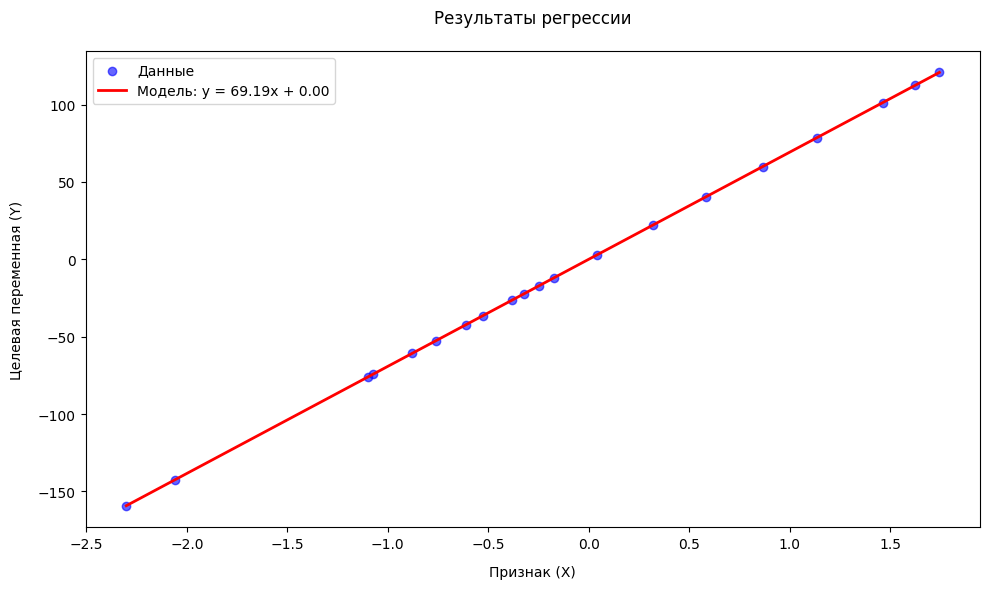

In [177]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

hyp = Model(b0=0, b1=0)
steps, errors = hyp.fit(x, y, max_steps=10000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

plot = hyp.plot(x, y, title="Результаты регрессии")
plot.show()